In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [49]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_heart = fetch_ucirepo(id=145) 
  
# data (as pandas dataframes) 
X = np.array(statlog_heart.data.features)
y = np.array(statlog_heart.data.targets)
statlog_df = np.concatenate((X, y), axis = 1)
df_statlog = pd.DataFrame(statlog_df)
df_statlog.rename(columns = {0 : 'age', 1 : 'sex', 2 : 'chest-pain', 3 : 'rest-bp', 4 : 'serum-chol',5 : 'fasting-blood-sugar', 6 : 'electrocardiographic', 7 : 'max-heart-rate', 8 : 'angina', 9 : 'oldpeak',10 : 'slope', 11 : 'major-vessels', 12 : 'thal', 13 : 'heart-disease'}, inplace = True)
df_statlog['heart-disease'] = df_statlog['heart-disease'].replace({2.0 : 1, 1.0 : -1})
df_statlog

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal,heart-disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,1.0
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,-1.0
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,1.0
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,-1.0
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,-1.0
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,-1.0
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,-1.0
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,-1.0


In [50]:
df_statlog.isna().sum()

age                     0
sex                     0
chest-pain              0
rest-bp                 0
serum-chol              0
fasting-blood-sugar     0
electrocardiographic    0
max-heart-rate          0
angina                  0
oldpeak                 0
slope                   0
major-vessels           0
thal                    0
heart-disease           0
dtype: int64

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values1 = scaler.fit_transform(df_statlog[['rest-bp']])
scaled_values2 = scaler.fit_transform(df_statlog[['serum-chol']])
scaled_values3 = scaler.fit_transform(df_statlog[['max-heart-rate']])
scaled_values4 = scaler.fit_transform(df_statlog[['age']])
df_statlog['rest-bp'] = scaled_values1
df_statlog['serum-chol'] = scaled_values2
df_statlog['max-heart-rate'] = scaled_values3
df_statlog['age'] = scaled_values4
df_statlog

,age,sex,chest-pain,rest-bp,serum-chol,fasting-blood-sugar,electrocardiographic,max-heart-rate,angina,oldpeak,slope,major-vessels,thal,heart-disease
0,0.854167,1.0,4.0,0.339623,0.447489,0.0,2.0,0.290076,0.0,2.4,2.0,3.0,3.0,1.0
1,0.791667,0.0,3.0,0.198113,1.000000,0.0,2.0,0.679389,0.0,1.6,2.0,0.0,7.0,-1.0
2,0.583333,1.0,2.0,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.3,1.0,0.0,7.0,1.0
3,0.729167,1.0,4.0,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.2,2.0,1.0,7.0,-1.0
4,0.937500,0.0,2.0,0.245283,0.326484,0.0,2.0,0.381679,1.0,0.2,1.0,1.0,3.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.479167,1.0,3.0,0.735849,0.166667,1.0,0.0,0.694656,0.0,0.5,1.0,0.0,7.0,-1.0
266,0.312500,1.0,2.0,0.245283,0.312785,0.0,0.0,0.778626,0.0,0.0,1.0,0.0,7.0,-1.0
267,0.562500,0.0,2.0,0.433962,0.383562,0.0,2.0,0.625954,0.0,1.3,2.0,0.0,3.0,-1.0
268,0.583333,1.0,4.0,0.433962,0.150685,0.0,0.0,0.587786,0.0,0.4,2.0,0.0,6.0,-1.0


In [52]:
from sklearn.model_selection import train_test_split
x_data = df_statlog.iloc[ :, 0 : 13]
y_data = df_statlog.iloc[ :, 13]
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 0, train_size = 0.7)

In [53]:
from sklearn.cluster import KMeans
import train_RBF
from sklearn.metrics import accuracy_score

lst_acc_test = list()
lst_acc_train = list()
lst_clusters = list()

for i in range(1, 185, 1):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto').fit(X_train)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    ret_ = train_RBF.trainRBF(X_train, y_train, cluster_centers.shape[0], 0.6)
    
    yhat_test = train_RBF.y_RBF(X_test, ret_)
    yhat_test[yhat_test <= -0.5] = -1
    yhat_test[yhat_test > -0.5] = 1
    yhat_train = train_RBF.y_RBF(X_train, ret_)
    yhat_train[yhat_train <= -0.5] = -1
    yhat_train[yhat_train > -0.5] = 1
    
    acc_test = accuracy_score(y_test, yhat_test)
    acc_train = accuracy_score(y_train, yhat_train)
    lst_acc_test.append(acc_test)
    lst_acc_train.append(acc_train)
    lst_clusters.append(i)

H shape : (189, 1)
Haug shape : (189, 2)
yin shape : (189,)
W shape : (2,)
H shape : (189, 2)
Haug shape : (189, 3)
yin shape : (189,)
W shape : (3,)
H shape : (189, 3)
Haug shape : (189, 4)
yin shape : (189,)
W shape : (4,)
H shape : (189, 4)
Haug shape : (189, 5)
yin shape : (189,)
W shape : (5,)
H shape : (189, 5)
Haug shape : (189, 6)
yin shape : (189,)
W shape : (6,)
H shape : (189, 6)
Haug shape : (189, 7)
yin shape : (189,)
W shape : (7,)
H shape : (189, 7)
Haug shape : (189, 8)
yin shape : (189,)
W shape : (8,)
H shape : (189, 8)
Haug shape : (189, 9)
yin shape : (189,)
W shape : (9,)
H shape : (189, 9)
Haug shape : (189, 10)
yin shape : (189,)
W shape : (10,)
H shape : (189, 10)
Haug shape : (189, 11)
yin shape : (189,)
W shape : (11,)
H shape : (189, 11)
Haug shape : (189, 12)
yin shape : (189,)
W shape : (12,)
H shape : (189, 12)
Haug shape : (189, 13)
yin shape : (189,)
W shape : (13,)
H shape : (189, 13)
Haug shape : (189, 14)
yin shape : (189,)
W shape : (14,)
H shape : (

In [54]:
idx_test = np.argmax(lst_acc_test)
idx_train = np.argmax(lst_acc_train)
print(f"The best accuracy in test was {np.max(lst_acc_test)} and it was with {lst_clusters[idx_test]} radial neurons.")
print(f"The best accuracy in train was {np.max(lst_acc_train)} and it was with {lst_clusters[idx_train]} radial neurons.")

The best accuracy in test was 0.7777777777777778 and it was with 173 radial neurons.
The best accuracy in train was 1.0 and it was with 169 radial neurons.


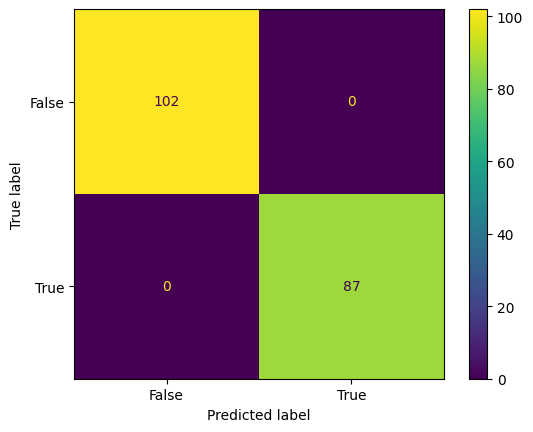

In [55]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, yhat_train)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

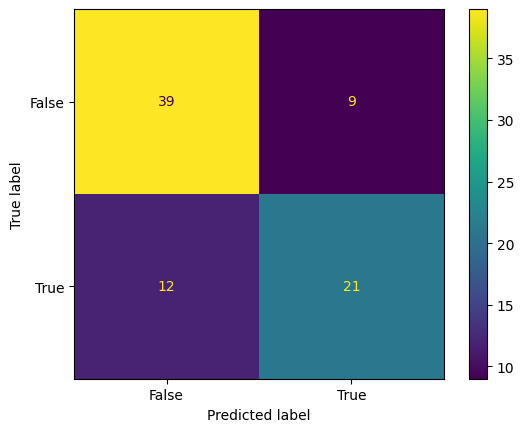

In [56]:
from sklearn import metrics
confusion_matrix_2 = metrics.confusion_matrix(y_test, yhat_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_2, display_labels = [False, True])
#plt.title(' TEST DATA RESULT')
cm_display.plot()
plt.show()

#### Selecionando, randomicamente os centros.

In [57]:
def trainRBFrandomic(xin, yin, centers):
    r = (np.linalg.norm(rand_centers[0] - rand_centers[1]) / 2) # o raio é a metade da distância entre cada quartile.
    try:
        N = xin.shape[0] # Number of samples
        n = xin.shape[1] # Input dimension
    except Exception as error:
        print(f"You're having the error {error}. So we will change the numer of dimensions...")
        n = 1
    xin = np.array(xin)
    yin = np.array(yin)
    
    
    m = np.array(centers) # Pegando os centros de cada cluster.
    covi = r*np.eye(n)
    inv_covi = (1 / r)*np.eye(n)# Calculando a matriz de covariancia inversa.

    # Para cada dado de entrada : 
    # 1- Aplicar a radial_n_var do dado de entrada para cada uma das p centróides, e por fim, encontrar toda a matriz H.
    # 2- Encontrar a matriz H para cada entrada em relação a cada centróide
    # 3- Lembrar que H[j, i] representa a distancia de cada ponto J até um centroide i.
    H = np.zeros((N, centers.shape[0]))
    for j in range(N):
        for i in range(centers.shape[0]):
            mi = m[i,] # A variável mi conterá os centros de cada centróide.
            H[j, i] = train_RBF.radial_n_var(xin[j, ], mi, inv_covi)
            
    print(f"H shape : {H.shape}")
    # Com a matriz H, a solução será obtida através da pseudoinversa.
    ones = np.ones((H.shape[0], 1))
    Haug = np.concatenate((H, ones), axis = 1)
    print(f"Haug shape : {Haug.shape}")
    print(f"yin shape : {yin.shape}")
    
    W = np.dot(np.linalg.pinv(Haug), yin)
    print(f"W shape : {W.shape}")

    return [m, covi, r, W, H]

In [58]:
first_quartile_vec = np.array(x_data.quantile(0.25)).reshape(1, -1)
third_quartile_vec = np.array(x_data.quantile(0.75)).reshape(1, -1)
rand_centers = np.concatenate((first_quartile_vec, third_quartile_vec), axis = 0)

In [62]:
from sklearn.metrics import accuracy_score
mean_acc = 0
lst_of_results = list()

for i in range(20): 
    ret_rand = trainRBFrandomic(x_data, y_data, rand_centers)
    yhat_test_rand_ = train_RBF.y_RBF(X_test, ret_rand)
    yhat_test_rand_[yhat_test_rand_ <= -0.5] = -1
    yhat_test_rand_[yhat_test_rand_ > -0.5] = 1

    yhat_train_rand = train_RBF.y_RBF(X_train, ret_rand)
    yhat_train_rand[yhat_train_rand <= -0.5] = -1
    yhat_train_rand[yhat_train_rand > -0.5] = 1
    lst_of_results.append(accuracy_score(y_test, yhat_test_rand_))
    mean_acc += accuracy_score(y_test, yhat_test_rand_)

lst_of_results = np.array(lst_of_results)
mean_acc = mean_acc / lst_of_results.shape[0]
stand_dev = 0
for i in range(20):
    stand_dev = (lst_of_results[i] - mean_acc) ** 2
stand_dev = stand_dev / lst_of_results.shape[0]

H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug shape : (270, 3)
yin shape : (270,)
W shape : (3,)
H shape : (270, 2)
Haug s

In [63]:
print(f"The mean accuracy in test was ({mean_acc} +- {stand_dev}).")

The mean accuracy in test was (0.7037037037037039 +- 2.465190328815662e-33).


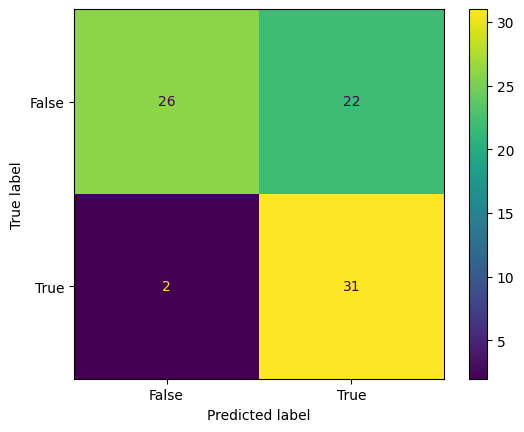

In [60]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, yhat_test_rand_)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

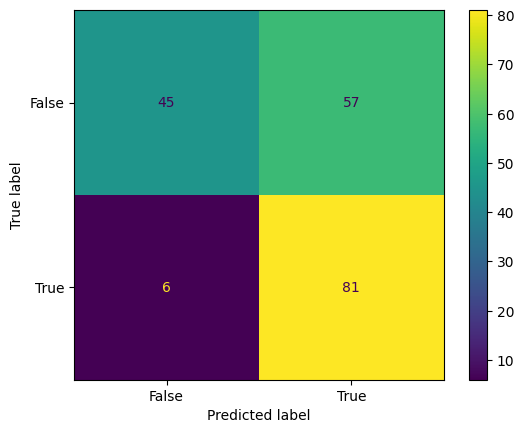

In [61]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_train, yhat_train_rand)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
#plt.title(' TRAIN DATA RESULT')
cm_display.plot()
plt.show()

#### Resultado semelhante, com N neuronios : 

In [64]:
from sklearn.cluster import KMeans
import train_RBF
from sklearn.metrics import accuracy_score

n_neurons = 0

for i in range(1, 185, 1):
    kmeans = KMeans(n_clusters = i, random_state = 0, n_init = 'auto').fit(X_train)
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    ret_ = train_RBF.trainRBF(X_train, y_train, cluster_centers.shape[0], 0.6)
    
    yhat_test = train_RBF.y_RBF(X_test, ret_)
    yhat_test[yhat_test <= -0.5] = -1
    yhat_test[yhat_test > -0.5] = 1
    yhat_train = train_RBF.y_RBF(X_train, ret_)
    yhat_train[yhat_train <= -0.5] = -1
    yhat_train[yhat_train > -0.5] = 1
    
    acc_test = accuracy_score(y_test, yhat_test)
    if (acc_test > 0.68) & (acc_test < 0.73):
        n_neurons = i

print(f"With {n_neurons} we have a good aproximation using KMeans algorithm...")


H shape : (189, 1)
Haug shape : (189, 2)
yin shape : (189,)
W shape : (2,)
H shape : (189, 2)
Haug shape : (189, 3)
yin shape : (189,)
W shape : (3,)
H shape : (189, 3)
Haug shape : (189, 4)
yin shape : (189,)
W shape : (4,)
H shape : (189, 4)
Haug shape : (189, 5)
yin shape : (189,)
W shape : (5,)
H shape : (189, 5)
Haug shape : (189, 6)
yin shape : (189,)
W shape : (6,)
H shape : (189, 6)
Haug shape : (189, 7)
yin shape : (189,)
W shape : (7,)
H shape : (189, 7)
Haug shape : (189, 8)
yin shape : (189,)
W shape : (8,)
H shape : (189, 8)
Haug shape : (189, 9)
yin shape : (189,)
W shape : (9,)
H shape : (189, 9)
Haug shape : (189, 10)
yin shape : (189,)
W shape : (10,)
H shape : (189, 10)
Haug shape : (189, 11)
yin shape : (189,)
W shape : (11,)
H shape : (189, 11)
Haug shape : (189, 12)
yin shape : (189,)
W shape : (12,)
H shape : (189, 12)
Haug shape : (189, 13)
yin shape : (189,)
W shape : (13,)
H shape : (189, 13)
Haug shape : (189, 14)
yin shape : (189,)
W shape : (14,)
H shape : (

In [65]:
print(f"With {n_neurons} we have a good aproximation using KMeans algorithm...")

With 183 we have a good aproximation using KMeans algorithm...
